In [ ]:
import pandas as pd
data = pd.read_csv('D:/innovize/data.csv')

In [2]:
print(data)

      phy_fitness    diet_pref       act_level  sleep_hrs  mindfulness  \
0             3.0        Vegan       Sedentary          7           10   
1             4.0        Vegan  Lightly Active          7            1   
2             8.0   Vegetarian          Active          8           10   
3             2.0  Pescatarian       Sedentary          8            7   
4             9.0  Pescatarian   Highly Active          5            7   
...           ...          ...             ...        ...          ...   
5995          7.0         Keto          Active          7            8   
5996          2.0         Keto       Sedentary          5            4   
5997          2.0         Keto       Sedentary          7            7   
5998          7.0        Vegan          Active          9            2   
5999          7.0  Pescatarian          Active          8            3   

          career  gender  daily_avg_steps  daily_avg_calories  is_healthy  
0         Artist     1.0           

In [5]:
print(data.isnull().sum())

phy_fitness            3
diet_pref              4
act_level              6
sleep_hrs              0
mindfulness            0
career                 4
gender                 1
daily_avg_steps       11
daily_avg_calories    14
is_healthy             0
dtype: int64


                                                handling missing values using imputation


In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Check for missing values
print(data.isnull().sum())

# Impute missing values
# For numerical columns, use mean or median
num_imputer = SimpleImputer(strategy='mean')
numerical_cols = ['phy_fitness', 'sleep_hrs', 'mindfulness', 'daily_avg_steps', 'daily_avg_calories']
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# For categorical columns, use mode
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = ['diet_pref', 'act_level', 'career', 'gender']
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Verify no missing values remain
print(data.isnull().sum())

phy_fitness            3
diet_pref              4
act_level              6
sleep_hrs              0
mindfulness            0
career                 4
gender                 1
daily_avg_steps       11
daily_avg_calories    14
is_healthy             0
dtype: int64
phy_fitness           0
diet_pref             0
act_level             0
sleep_hrs             0
mindfulness           0
career                0
gender                0
daily_avg_steps       0
daily_avg_calories    0
is_healthy            0
dtype: int64


In [9]:
# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['diet_pref', 'act_level', 'career', 'gender'], drop_first=True)

# Check the transformed dataset
print(data.head())

   phy_fitness  sleep_hrs  mindfulness  daily_avg_steps  daily_avg_calories  \
0          3.0        7.0         10.0           2020.0              1831.0   
1          4.0        7.0          1.0           5154.0              2190.0   
2          8.0        8.0         10.0          12363.0              2297.0   
3          2.0        8.0          7.0           1664.0              1943.0   
4          9.0        5.0          7.0          17680.0              3527.0   

   is_healthy  diet_pref_Non-Vegetarian  diet_pref_Pescatarian  \
0           0                     False                  False   
1           0                     False                  False   
2           1                     False                  False   
3           0                     False                   True   
4           1                     False                   True   

   diet_pref_Vegan  diet_pref_Vegetarian  ...  career_Business  career_Doctor  \
0             True                 False  ...  

                                     splitting the dataset into train and test

In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('is_healthy', axis=1)
y = data['is_healthy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                                       training the model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.33%


In [14]:
X_vis = X[['phy_fitness', 'mindfulness']]
y_vis = y

In [21]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_vis, y_vis)

SVC(kernel='linear')

C:\Users\npime\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


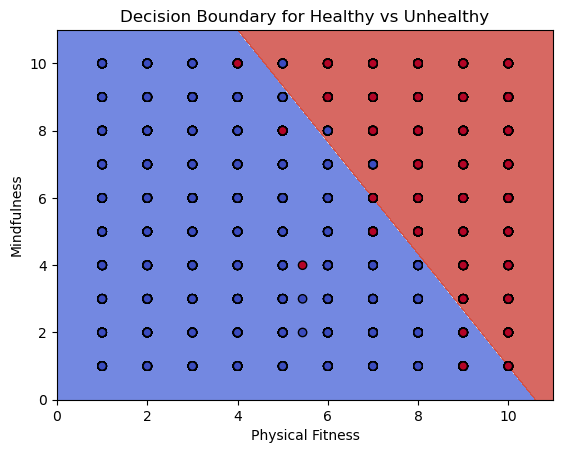

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid
x_min, x_max = X_vis['phy_fitness'].min() - 1, X_vis['phy_fitness'].max() + 1
y_min, y_max = X_vis['mindfulness'].min() - 1, X_vis['mindfulness'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis['phy_fitness'], X_vis['mindfulness'], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Physical Fitness')
plt.ylabel('Mindfulness')
plt.title('Decision Boundary for Healthy vs Unhealthy')
plt.show()